In [114]:
import pandas as pd
import numpy as np
from IPython.display import Image
from tqdm import tqdm_notebook as tqdm
import json
import matplotlib.pyplot as plt
import csv
# adjust dimensions of plot area to make it look better
plt.rcParams['figure.figsize'] = (15, 7)
from sklearn.feature_extraction.text import CountVectorizer
import papermill as pm
from random import randint
from sklearn.metrics import f1_score
from statistics import mode
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import time

In [2]:
def extract_data(filepath):
    dataset = []
    f = open(filepath)
    for line in f.readlines():
        edited_line = line.strip().replace('\'', '').lower()
        example = []
        example.append(edited_line[:-1].strip())
        example.append(int(edited_line[-1]))
        dataset.append(example)
    
    return dataset

In [3]:
"""
Extracting training datasets for Yelp and IMDB
"""

'\nExtracting training datasets for Yelp and IMDB\n'

In [4]:
yelp_train = extract_data('./hwk3_datasets/yelp-train.txt')
imdb_train = extract_data('./hwk3_datasets/IMDB-train.txt')

yelp_valid = extract_data('./hwk3_datasets/yelp-valid.txt')
imdb_valid = extract_data('./hwk3_datasets/IMDB-valid.txt')

yelp_test = extract_data('./hwk3_datasets/yelp-test.txt')
imdb_test = extract_data('./hwk3_datasets/IMDB-test.txt')

In [5]:
"""
Making dataframes for the train, valid and test sets of Yelp and IMDB
"""

'\nMaking dataframes for the train, valid and test sets of Yelp and IMDB\n'

In [6]:
yelp_columns = ['review', 'rating']
imdb_columns = ['review', 'sentiment']

yelp_train_df = pd.DataFrame(data=yelp_train, columns=yelp_columns)
imdb_train_df = pd.DataFrame(data=imdb_train, columns=imdb_columns)

yelp_valid_df = pd.DataFrame(data=yelp_valid, columns=yelp_columns)
imdb_valid_df = pd.DataFrame(data=imdb_valid, columns=imdb_columns)

yelp_test_df = pd.DataFrame(data=yelp_test, columns=yelp_columns)
imdb_test_df = pd.DataFrame(data=imdb_test, columns=imdb_columns)

In [7]:
"""
Storing the input (reviews) for the
train, valid and test sets of Yelp and IMDB
"""

'\nStoring the input (reviews) for the\ntrain, valid and test sets of Yelp and IMDB\n'

In [8]:
yelp_train_input = list(yelp_train_df['review'])
imdb_train_input = list(imdb_train_df['review'])

yelp_valid_input = list(yelp_valid_df['review'])
imdb_valid_input = list(imdb_valid_df['review'])

yelp_test_input = list(yelp_test_df['review'])
imdb_test_input = list(imdb_test_df['review'])

In [9]:
"""
Storing the rating (Yelp) and sentiment (IMDB)
for the train, valid and test sets of Yelp and IMDB
"""

'\nStoring the rating (Yelp) and sentiment (IMDB)\nfor the train, valid and test sets of Yelp and IMDB\n'

In [10]:
yelp_train_output = list(yelp_train_df['rating'])
imdb_train_output = list(imdb_train_df['sentiment'])

yelp_valid_output = list(yelp_valid_df['rating'])
imdb_valid_output = list(imdb_valid_df['sentiment'])

yelp_test_output = list(yelp_test_df['rating'])
imdb_test_output = list(imdb_test_df['sentiment'])

In [11]:
"""
Using a CountVectorizer will turn the
words into lowercase and remove the punctuations
"""

'\nUsing a CountVectorizer will turn the\nwords into lowercase and remove the punctuations\n'

In [12]:
yelp_vectorizer = CountVectorizer()
yelp_vectors_train = yelp_vectorizer.fit_transform(yelp_train_input)

imdb_vectorizer = CountVectorizer()
imdb_vectors_train = imdb_vectorizer.fit_transform(imdb_train_input)

In [13]:
"""
Get the frequency of the
words in a vocabulary.

Return: A dictionary
which has the structure - 
    key = word
    value = [id, count]
"""

'\nGet the frequency of the\nwords in a vocabulary.\n\nReturn: A dictionary\nwhich has the structure - \n    key = word\n    value = [id, count]\n'

In [14]:
def get_vocab_frequencies(dataset_input, dataset_vectorizer):
    word_id_count = {}
    for example in dataset_input:
        words = example.split()
        for word in words:
            if word in dataset_vectorizer.vocabulary_:
                if word not in word_id_count:
                    word_id_count[word] = [dataset_vectorizer.vocabulary_[word], 1]
                else:
                    word_id_count[word][1] += 1

    return word_id_count

In [15]:
yelp_train_frequencies = get_vocab_frequencies(yelp_train_input, yelp_vectorizer)
imdb_train_frequencies = get_vocab_frequencies(imdb_train_input, imdb_vectorizer)

In [16]:
"""
Sorting the words in the dictionary
in descending order of frequencies.
Getting the top 10,000 words (words
with the highest frequencies). These
words form the feature set.
"""

'\nSorting the words in the dictionary\nin descending order of frequencies.\nGetting the top 10,000 words (words\nwith the highest frequencies). These\nwords form the feature set.\n'

In [17]:
yelp_feature_set = sorted(yelp_train_frequencies.items(), key=lambda kv: kv[1][1], reverse=True)[:10000]
imdb_feature_set = sorted(imdb_train_frequencies.items(), key=lambda kv: kv[1][1], reverse=True)[:10000]

In [18]:
"""
Binary Bag-of-Words Representation:-

Making a new vectorizer for Yelp and IMDB.
The new vectorizer is based on the 10,000
words with the highest frequencies.

Transform the valid and test input according
to the vectorizer just found. Convert the result
into an array. Modify the array such that the
value along a dimension gets set to 1 if its
value is greater than zero else it gets set to 0.
"""

'\nBinary Bag-of-Words Representation:-\n\nMaking a new vectorizer for Yelp and IMDB.\nThe new vectorizer is based on the 10,000\nwords with the highest frequencies.\n\nTransform the valid and test input according\nto the vectorizer just found. Convert the result\ninto an array. Modify the array such that the\nvalue along a dimension gets set to 1 if its\nvalue is greater than zero else it gets set to 0.\n'

In [19]:
# Train vectors are wrong
# yelp_vectorizer_final_binary = CountVectorizer()
# yelp_temp_df = pd.DataFrame(data=yelp_feature_set, columns=["word", "id_and_count"])
# yelp_vectors_train_final_binary = yelp_vectorizer_final_binary.fit_transform(list(yelp_temp_df["word"]))
# yelp_vectors_train_final_binary = (yelp_vectors_train_final_binary.toarray() > 0).astype(int)

# yelp_valid_temp1 = yelp_vectorizer_final_binary.transform(yelp_valid_input).toarray()
# yelp_vectors_valid_binary = (yelp_valid_temp1 > 0).astype(int)

# yelp_test_temp1 = yelp_vectorizer_final_binary.transform(yelp_test_input).toarray()
# yelp_vectors_test_binary = (yelp_test_temp1 > 0).astype(int)

In [20]:
yelp_vectorizer_final_binary = CountVectorizer()
yelp_temp_df = pd.DataFrame(data=yelp_feature_set, columns=["word", "id_and_count"])
yelp_vectorizer_final_binary = yelp_vectorizer_final_binary.fit(list(yelp_temp_df["word"]))

yelp_train_temp1 = yelp_vectorizer_final_binary.transform(yelp_train_input).toarray()
yelp_vectors_train_binary = (yelp_train_temp1 > 0).astype(int)

yelp_valid_temp1 = yelp_vectorizer_final_binary.transform(yelp_valid_input).toarray()
yelp_vectors_valid_binary = (yelp_valid_temp1 > 0).astype(int)

yelp_test_temp1 = yelp_vectorizer_final_binary.transform(yelp_test_input).toarray()
yelp_vectors_test_binary = (yelp_test_temp1 > 0).astype(int)

In [21]:
imdb_vectorizer_final_binary = CountVectorizer()
imdb_temp_df = pd.DataFrame(data=imdb_feature_set, columns=["word", "id_and_count"])
imdb_vectorizer_final_binary = imdb_vectorizer_final_binary.fit(list(imdb_temp_df["word"]))

imdb_train_temp1 = imdb_vectorizer_final_binary.transform(imdb_train_input).toarray()
imdb_vectors_train_binary = (imdb_train_temp1 > 0).astype(int)

imdb_valid_temp1 = imdb_vectorizer_final_binary.transform(imdb_valid_input).toarray()
imdb_vectors_valid_binary = (imdb_valid_temp1 > 0).astype(int)

imdb_test_temp1 = imdb_vectorizer_final_binary.transform(imdb_test_input).toarray()
imdb_vectors_test_binary = (imdb_test_temp1 > 0).astype(int)

In [22]:
# # Train vectors are wrong
# imdb_vectorizer_final_binary = CountVectorizer()
# imdb_temp_df = pd.DataFrame(data=imdb_feature_set, columns=["word", "id_and_count"])
# imdb_vectors_train_final_binary = imdb_vectorizer_final_binary.fit_transform(list(imdb_temp_df["word"]))
# imdb_vectors_train_final_binary = (imdb_vectors_train_final_binary.toarray() > 0).astype(int)

# imdb_valid_temp1 = imdb_vectorizer_final_binary.transform(imdb_valid_input).toarray()
# imdb_vectors_valid_binary = (imdb_valid_temp1 > 0).astype(int)

# imdb_test_temp1 = imdb_vectorizer_final_binary.transform(imdb_test_input).toarray()
# imdb_vectors_test_binary = (imdb_test_temp1 > 0).astype(int)

In [23]:
"""
Frequency Bag-of-Words representation
"""

'\nFrequency Bag-of-Words representation\n'

In [24]:
def make_frequency_array(arr):
    for i in range(len(arr)):
        example_sum = arr[i].sum()
        if example_sum != 0:
            arr[i] = arr[i]/example_sum
    
    return arr

In [25]:
# train vectors are wrong
# yelp_vectorizer_final_frequency = CountVectorizer()
# yelp_vectors_train_final_frequency = yelp_vectorizer_final_frequency.fit_transform(list(yelp_temp_df["word"]))
# yelp_vectors_train_final_frequency = make_frequency_array(yelp_vectors_train_final_frequency.toarray().astype(float))

# yelp_valid_temp2 = yelp_vectorizer_final_frequency.transform(yelp_valid_input).toarray()
# yelp_vectors_valid_frequency = make_frequency_array(yelp_valid_temp2.astype(float))

# yelp_test_temp2 = yelp_vectorizer_final_frequency.transform(yelp_test_input).toarray()
# yelp_vectors_test_frequency = make_frequency_array(yelp_test_temp2.astype(float))

In [26]:
yelp_vectorizer_final_frequency = CountVectorizer()
yelp_vectorizer_final_frequency = yelp_vectorizer_final_frequency.fit(list(yelp_temp_df["word"]))

yelp_train_temp2 = yelp_vectorizer_final_frequency.transform(yelp_train_input).toarray()
yelp_vectors_train_frequency = make_frequency_array(yelp_train_temp2.astype(float))

yelp_valid_temp2 = yelp_vectorizer_final_frequency.transform(yelp_valid_input).toarray()
yelp_vectors_valid_frequency = make_frequency_array(yelp_valid_temp2.astype(float))

yelp_test_temp2 = yelp_vectorizer_final_frequency.transform(yelp_test_input).toarray()
yelp_vectors_test_frequency = make_frequency_array(yelp_test_temp2.astype(float))

In [27]:
imdb_vectorizer_final_frequency = CountVectorizer()
imdb_vectorizer_final_frequency = imdb_vectorizer_final_frequency.fit(list(imdb_temp_df["word"]))

imdb_train_temp2 = imdb_vectorizer_final_frequency.transform(imdb_train_input).toarray()
imdb_vectors_train_frequency = make_frequency_array(imdb_train_temp2.astype(float))

imdb_valid_temp2 = imdb_vectorizer_final_frequency.transform(imdb_valid_input).toarray()
imdb_vectors_valid_frequency = make_frequency_array(imdb_valid_temp2.astype(float))

imdb_test_temp2 = imdb_vectorizer_final_frequency.transform(imdb_test_input).toarray()
imdb_vectors_test_frequency = make_frequency_array(imdb_test_temp2.astype(float))

In [28]:
# Train vectors are wrong
# imdb_vectorizer_final_frequency = CountVectorizer()
# imdb_vectors_train_final_frequency = imdb_vectorizer_final_frequency.fit_transform(list(imdb_temp_df["word"]))
# imdb_vectors_train_final_frequency = make_frequency_array(imdb_vectors_train_final_frequency.toarray().astype(float))

# imdb_valid_temp2 = imdb_vectorizer_final_frequency.transform(imdb_valid_input).toarray()
# imdb_vectors_valid_frequency = make_frequency_array(imdb_valid_temp2.astype(float))

# imdb_test_temp2 = imdb_vectorizer_final_frequency.transform(imdb_test_input).toarray()
# imdb_vectors_test_frequency = make_frequency_array(imdb_test_temp2.astype(float))

In [29]:
imdb_vectors_test_binary.shape

(25000, 10000)

In [30]:
"""
Generating the data files
for the submission

Commented out since do not
have to write the files again
"""

'\nGenerating the data files\nfor the submission\n\nCommented out since do not\nhave to write the files again\n'

In [31]:
# with open('./Files_to_submit/data/q1/yelp-vocab.txt', 'w') as f:
#     for feature in yelp_feature_set:
#         word_details = [str(feature[0]), str(feature[1][0]), str(feature[1][1])]
#         f.write('\t'.join(word_details))
#         f.write('\n')

In [32]:
# with open('./Files_to_submit/data/q1/IMDB-vocab.txt', 'w') as f:
#     for feature in imdb_feature_set:
#         word_details = [str(feature[0]), str(feature[1][0]), str(feature[1][1])]
#         f.write('\t'.join(word_details))
#         f.write('\n')

In [33]:
def write_dataset_file(vocab, dataset_df, filename, label_name):
    with open('./Files_to_submit/data/q1/' + filename, 'w') as f:
        for i in range(len(dataset_df)):
            review = dataset_df['review'][i]
            word_ids = []
            for word in review.split():
                if word in vocab:
                    word_ids.append(str(int(vocab[word][0])))
                    
            f.write(' '.join(word_ids))
            f.write('\t' + str(int(dataset_df[label_name][i])))
            f.write('\n')

In [34]:
# yelp_dictionary = dict(yelp_feature_set)
# imdb_dictionary = dict(imdb_feature_set)

# write_dataset_file(yelp_dictionary, yelp_train_df, 'yelp-train.txt', yelp_columns[1])
# write_dataset_file(yelp_dictionary, yelp_valid_df, 'yelp-valid.txt', yelp_columns[1])
# write_dataset_file(yelp_dictionary, yelp_test_df, 'yelp-test.txt', yelp_columns[1])

# write_dataset_file(imdb_dictionary, imdb_train_df, 'IMDB-train.txt', imdb_columns[1])
# write_dataset_file(imdb_dictionary, imdb_valid_df, 'IMDB-valid.txt', imdb_columns[1])
# write_dataset_file(imdb_dictionary, imdb_test_df, 'IMDB-test.txt', imdb_columns[1])

In [35]:
##### PART 2 #####

In [36]:
### 2.a ###

In [37]:
"""
Yelp Random Classifier
"""

'\nYelp Random Classifier\n'

In [38]:
yelp_test_random_pred = [randint(1,5) for i in range(len(yelp_test_output))]

In [39]:
yelp_test_random_f1_score = f1_score(yelp_test_output, yelp_test_random_pred, average='micro')

In [40]:
yelp_test_random_f1_score

0.198

In [41]:
pm.record("2a. Yelp Random F1", str(yelp_test_random_f1_score))

In [42]:
"""
Yelp Majority Classifier
"""

'\nYelp Majority Classifier\n'

In [43]:
yelp_train_majority = mode(yelp_train_output)

In [44]:
yelp_test_majority_pred = [yelp_train_majority for i in range(len(yelp_test_output))]

In [45]:
yelp_test_majority_f1_score = f1_score(yelp_test_output, yelp_test_majority_pred, average='micro')

In [46]:
yelp_test_majority_f1_score

0.351

In [ ]:
pm.record("2a. Yelp Majority F1", str(yelp_test_majority_f1_score))

In [47]:
### 2.b ###

In [48]:
"""
Yelp Bernoulli Naive Bayes
"""

'\nYelp Bernoulli Naive Bayes\n'

In [49]:
alpha_vals = [i/50 for i in range(1, 51)]
yelp_bbow_bernoullinb_valid_f1_scores = []
for val_alpha in tqdm(alpha_vals):
    yelp_bbow_bernoullinb_clf = BernoulliNB(alpha=val_alpha)
    yelp_bbow_bernoullinb_clf = yelp_bbow_bernoullinb_clf.fit(yelp_vectors_train_binary, yelp_train_output)
    yelp_bbow_bernoullinb_valid_pred = yelp_bbow_bernoullinb_clf.predict(yelp_vectors_valid_binary)
    f1 = f1_score(yelp_valid_output, yelp_bbow_bernoullinb_valid_pred, average='micro')
    yelp_bbow_bernoullinb_valid_f1_scores.append(f1)

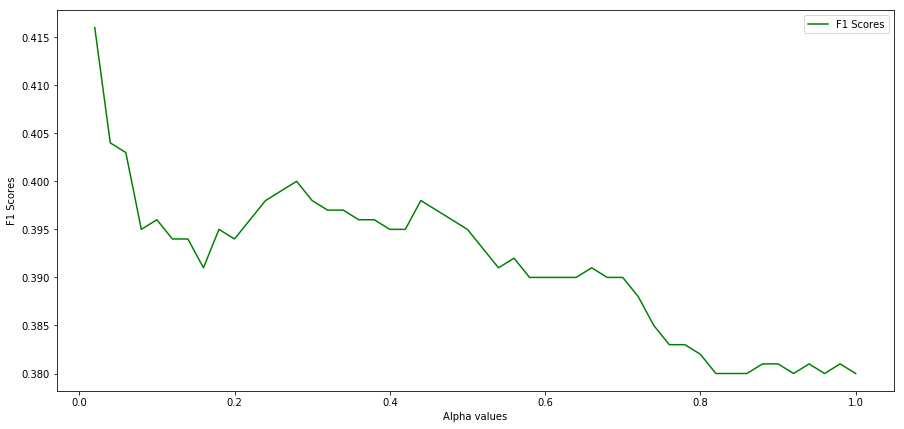

In [52]:
plt.plot(alpha_vals, yelp_bbow_bernoullinb_valid_f1_scores, 'g', label='F1 Scores')
plt.xlabel('Alpha values')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

In [53]:
max_index = yelp_bbow_bernoullinb_valid_f1_scores.index(max(yelp_bbow_bernoullinb_valid_f1_scores))
best_bbow_bernoullinb_alpha = alpha_vals[max_index]

In [54]:
best_bbow_bernoullinb_alpha

0.02

In [55]:
def get_bbow_bernoullinb_f1(train_vectors, train_output, best_bbow_bernoullinb_alpha, dataset_vectors, dataset_output):
    best_bbow_bernoullinb_clf = BernoulliNB(alpha=best_bbow_bernoullinb_alpha)
    best_bbow_bernoullinb_clf = best_bbow_bernoullinb_clf.fit(train_vectors, train_output)
    bbow_bernoullinb_dataset_pred = best_bbow_bernoullinb_clf.predict(dataset_vectors)
    bbow_bernoullinb_dataset_f1 = f1_score(dataset_output, bbow_bernoullinb_dataset_pred, average='micro')

    return bbow_bernoullinb_dataset_f1

In [56]:
yelp_bbow_bernoullinb_train_f1 = get_bbow_bernoullinb_f1(yelp_vectors_train_binary, yelp_train_output, best_bbow_bernoullinb_alpha, yelp_vectors_train_binary, yelp_train_output)
yelp_bbow_bernoullinb_valid_f1 = get_bbow_bernoullinb_f1(yelp_vectors_train_binary, yelp_train_output, best_bbow_bernoullinb_alpha, yelp_vectors_valid_binary, yelp_valid_output)
yelp_bbow_bernoullinb_test_f1 = get_bbow_bernoullinb_f1(yelp_vectors_train_binary, yelp_train_output, best_bbow_bernoullinb_alpha, yelp_vectors_test_binary, yelp_test_output)

In [57]:
print("Yelp Binary BoW BernoulliNB Train F1 Score:", yelp_bbow_bernoullinb_train_f1)
print("Yelp Binary BoW BernoulliNB Valid F1 Score:", yelp_bbow_bernoullinb_valid_f1)
print("Yelp Binary BoW BernoulliNB Test F1 Score:", yelp_bbow_bernoullinb_test_f1)
print("Best Binary BoW BernoulliNB Alpha Value: ", best_bbow_bernoullinb_alpha)

Yelp Binary BoW BernoulliNB Train F1 Score: 0.7337142857142858
Yelp Binary BoW BernoulliNB Valid F1 Score: 0.416
Yelp Binary BoW BernoulliNB Test F1 Score: 0.442
Best Binary BoW BernoulliNB Alpha Value:  0.02


In [ ]:
"""
Yelp Binary BoW Decision Trees
"""

In [134]:
yelp_bbow_decisiontree_clf = DecisionTreeClassifier()
list_max_depths = [10, 8, 6, 4] # [20*i for i in range(1, 6)] 
list_min_samples_splits = [400, 200, 100] # [20*i for i in range(1, 6)] 
list_min_samples_leaf = [400, 200, 100] # [20*i for i in range(1, 6)] 
list_max_features = [10000, 8000, 4000] # [2000*i for i in range(1, 6)]

tuned_parameters = [{'max_depth': list_max_depths, 'min_samples_split': list_min_samples_splits, 
                     'min_samples_leaf': list_min_samples_leaf, 'max_features': list_max_features}]
yelp_bbow_decisiontree_clf = GridSearchCV(yelp_bbow_decisiontree_clf, tuned_parameters, scoring='f1_micro', 
                                          cv=3, verbose=2)

In [135]:
yelp_bbow_decisiontree_clf = yelp_bbow_decisiontree_clf.fit(yelp_vectors_train_binary, yelp_train_output)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000, total=   3.1s
[CV] max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000, total=   3.0s
[CV] max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000 
[CV]  max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000, total=   3.0s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000, total=   3.0s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000, total=   3.1s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000, total=   3.0s
[CV] max_depth=10, min_samples_split=100, min_samples_leaf=400, max_features=10000 
[CV]  max_depth=10, min_samples_split=100, min_samples_leaf=400, max_features=10000, 

[CV]  max_depth=10, min_samples_split=400, min_samples_leaf=100, max_features=8000, total=   3.5s
[CV] max_depth=10, min_samples_split=400, min_samples_leaf=100, max_features=8000 
[CV]  max_depth=10, min_samples_split=400, min_samples_leaf=100, max_features=8000, total=   3.5s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000, total=   3.6s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000, total=   3.6s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000, total=   4.4s
[CV] max_depth=10, min_samples_split=100, min_samples_leaf=100, max_features=8000 
[CV]  max_depth=10, min_samples_split=100, min_samples_leaf=100, max_features=8000, total=   3.

[CV]  max_depth=8, min_samples_split=400, min_samples_leaf=200, max_features=10000, total=   3.6s
[CV] max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000 
[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000, total=   3.7s
[CV] max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000 
[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000, total=   4.0s
[CV] max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000 
[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000, total=   3.6s
[CV] max_depth=8, min_samples_split=100, min_samples_leaf=200, max_features=10000 
[CV]  max_depth=8, min_samples_split=100, min_samples_leaf=200, max_features=10000, total=   3.8s
[CV] max_depth=8, min_samples_split=100, min_samples_leaf=200, max_features=10000 
[CV]  max_depth=8, min_samples_split=100, min_samples_leaf=200, max_features=10000, total=   4.

[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=400, max_features=4000, total=   1.8s
[CV] max_depth=8, min_samples_split=200, min_samples_leaf=400, max_features=4000 
[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=400, max_features=4000, total=   2.0s
[CV] max_depth=8, min_samples_split=200, min_samples_leaf=400, max_features=4000 
[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=400, max_features=4000, total=   1.8s
[CV] max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000 
[CV]  max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000, total=   1.8s
[CV] max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000 
[CV]  max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000, total=   1.7s
[CV] max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000 
[CV]  max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000, total=   2.3s
[CV] max

[CV]  max_depth=6, min_samples_split=200, min_samples_leaf=100, max_features=10000, total=   4.1s
[CV] max_depth=6, min_samples_split=200, min_samples_leaf=100, max_features=10000 
[CV]  max_depth=6, min_samples_split=200, min_samples_leaf=100, max_features=10000, total=   4.0s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000, total=   3.9s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000, total=   4.2s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000, total=   4.0s
[CV] max_depth=6, min_samples_split=400, min_samples_leaf=400, max_features=8000 
[CV]  max_depth=6, min_samples_split=400, min_samples_leaf=400, max_features=8000, total=   2.4s

[CV]  max_depth=6, min_samples_split=200, min_samples_leaf=200, max_features=4000, total=   2.6s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000, total=   2.6s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000, total=   2.8s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000, total=   2.5s
[CV] max_depth=6, min_samples_split=400, min_samples_leaf=100, max_features=4000 
[CV]  max_depth=6, min_samples_split=400, min_samples_leaf=100, max_features=4000, total=   3.5s
[CV] max_depth=6, min_samples_split=400, min_samples_leaf=100, max_features=4000 
[CV]  max_depth=6, min_samples_split=400, min_samples_leaf=100, max_features=4000, total=   2.6s
[CV] max

[CV]  max_depth=4, min_samples_split=100, min_samples_leaf=400, max_features=8000, total=   2.8s
[CV] max_depth=4, min_samples_split=100, min_samples_leaf=400, max_features=8000 
[CV]  max_depth=4, min_samples_split=100, min_samples_leaf=400, max_features=8000, total=   2.6s
[CV] max_depth=4, min_samples_split=100, min_samples_leaf=400, max_features=8000 
[CV]  max_depth=4, min_samples_split=100, min_samples_leaf=400, max_features=8000, total=   3.0s
[CV] max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000 
[CV]  max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000, total=   2.9s
[CV] max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000 
[CV]  max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000, total=   3.3s
[CV] max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000 
[CV]  max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000, total=   3.4s
[CV] max

[CV]  max_depth=4, min_samples_split=100, min_samples_leaf=100, max_features=4000, total=   1.9s
[CV] max_depth=4, min_samples_split=100, min_samples_leaf=100, max_features=4000 
[CV]  max_depth=4, min_samples_split=100, min_samples_leaf=100, max_features=4000, total=   1.7s


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 17.5min finished


In [136]:
yelp_binary_dt_best_params = yelp_bbow_decisiontree_clf.best_params_

In [137]:
yelp_binary_dt_best_params

{'max_depth': 10,
 'max_features': 4000,
 'min_samples_leaf': 100,
 'min_samples_split': 400}

In [138]:
yelp_bbow_decisiontree_clf = DecisionTreeClassifier(max_depth=yelp_binary_dt_best_params['max_depth'],
                                                    max_features=yelp_binary_dt_best_params['max_features'], 
                                                    min_samples_leaf=yelp_binary_dt_best_params['min_samples_leaf'], 
                                                    min_samples_split=yelp_binary_dt_best_params['min_samples_split'])

In [139]:
yelp_bbow_decisiontree_clf = yelp_bbow_decisiontree_clf.fit(yelp_vectors_train_binary, yelp_train_output)

yelp_bbow_decisiontree_train_pred = yelp_bbow_decisiontree_clf.predict(yelp_vectors_train_binary)
yelp_bbow_decisiontree_valid_pred = yelp_bbow_decisiontree_clf.predict(yelp_vectors_valid_binary)
yelp_bbow_decisiontree_test_pred = yelp_bbow_decisiontree_clf.predict(yelp_vectors_test_binary)

yelp_bbow_decisiontree_train_f1 = f1_score(yelp_train_output, yelp_bbow_decisiontree_train_pred, average='micro')
yelp_bbow_decisiontree_valid_f1 = f1_score(yelp_valid_output, yelp_bbow_decisiontree_valid_pred, average='micro')
yelp_bbow_decisiontree_test_f1 = f1_score(yelp_test_output, yelp_bbow_decisiontree_test_pred, average='micro')

In [140]:
print("Yelp Binary BoW Decision Trees Train F1 Score:", yelp_bbow_decisiontree_train_f1)
print("Yelp Binary BoW Decision Trees Valid F1 Score:", yelp_bbow_decisiontree_valid_f1)
print("Yelp Binary BoW Decision Trees Test F1 Score:", yelp_bbow_decisiontree_test_f1)
print("Yelp Best Binary BoW Decision Trees Parameters: ", yelp_binary_dt_best_params)

Yelp Binary BoW Decision Trees Train F1 Score: 0.4277142857142857
Yelp Binary BoW Decision Trees Valid F1 Score: 0.38499999999999995
Yelp Binary BoW Decision Trees Test F1 Score: 0.425
Yelp Best Binary BoW Decision Trees Parameters:  {'max_depth': 10, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 4000}


In [107]:
"""
Yelp Binary BoW Linear SVM
"""

'\nYelp Binary BoW Linear SVM\n'

In [119]:
yelp_bbow_linearsvm_clf = LinearSVC(max_iter=5000)

# list_penalties = ['l1', 'l2']
# list_losses = ['hinge', 'squared_hinge']
list_dual = [True]
# list_dual = [True, False]
list_C = [2*i for i in range(1, 6)]
list_tol = [10**(-i*2) for i in range(1, 6)]

# {'penalty': ['l1'], 'loss': ['hinge'], 'dual': list_dual, 'C': list_C, 'tol': list_tol}
# {'penalty': ['l2'], 'loss': ['squared_hinge'], 'dual': list_dual, 'C': list_C, 'tol': list_tol}
tuned_parameters = [{'C': list_C, 'tol': list_tol}]
yelp_bbow_linearsvm_clf = GridSearchCV(yelp_bbow_linearsvm_clf, tuned_parameters, scoring='f1_micro', cv=3, 
                                       error_score='raise', verbose=2)

In [120]:
starttime = time.time()
yelp_bbow_linearsvm_clf = yelp_bbow_linearsvm_clf.fit(yelp_vectors_train_binary, yelp_train_output)
endtime = time.time()
print(endtime - starttime)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] tol=0.01, C=2 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... tol=0.01, C=2, total=   1.8s
[CV] tol=0.01, C=2 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .................................... tol=0.01, C=2, total=   1.5s
[CV] tol=0.01, C=2 ...................................................
[CV] .................................... tol=0.01, C=2, total=   1.4s
[CV] tol=0.0001, C=2 .................................................
[CV] .................................. tol=0.0001, C=2, total=   2.1s
[CV] tol=0.0001, C=2 .................................................
[CV] .................................. tol=0.0001, C=2, total=   2.2s
[CV] tol=0.0001, C=2 .................................................
[CV] .................................. tol=0.0001, C=2, total=   2.2s
[CV] tol=1e-06, C=2 ..................................................
[CV] ................................... tol=1e-06, C=2, total=   2.9s
[CV] tol=1e-06, C=2 ..................................................
[CV] ................................... tol=1e-06, C=2, total=   2.9s
[CV] tol=1e-06, C=2 ..................................................
[CV] .

[CV] ................................... tol=1e-10, C=8, total=   7.3s
[CV] tol=0.01, C=10 ..................................................
[CV] ................................... tol=0.01, C=10, total=   2.1s
[CV] tol=0.01, C=10 ..................................................
[CV] ................................... tol=0.01, C=10, total=   2.2s
[CV] tol=0.01, C=10 ..................................................
[CV] ................................... tol=0.01, C=10, total=   2.2s
[CV] tol=0.0001, C=10 ................................................
[CV] ................................. tol=0.0001, C=10, total=   3.4s
[CV] tol=0.0001, C=10 ................................................
[CV] ................................. tol=0.0001, C=10, total=   3.4s
[CV] tol=0.0001, C=10 ................................................
[CV] ................................. tol=0.0001, C=10, total=   3.2s
[CV] tol=1e-06, C=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  5.9min finished


354.1900939941406


In [121]:
yelp_binary_linearsvm_best_params = yelp_bbow_linearsvm_clf.best_params_

In [122]:
yelp_binary_linearsvm_best_params

{'C': 2, 'tol': 0.01}

In [ ]:
yelp_bbow_linearsvm_clf = LinearSVC(penalty=yelp_binary_linearsvm_best_params['penalty'],
                                    dual=yelp_binary_linearsvm_best_params['dual'], 
                                    C=yelp_binary_linearsvm_best_params['C'])

In [ ]:
yelp_bbow_linearsvm_clf = yelp_bbow_linearsvm_clf.fit(yelp_vectors_train_binary, yelp_train_output)

yelp_bbow_linearsvm_train_pred = yelp_bbow_linearsvm_clf.predict(yelp_vectors_train_binary)
yelp_bbow_linearsvm_valid_pred = yelp_bbow_linearsvm_clf.predict(yelp_vectors_valid_binary)
yelp_bbow_linearsvm_test_pred = yelp_bbow_linearsvm_clf.predict(yelp_vectors_test_binary)

yelp_bbow_linearsvm_train_f1 = f1_score(yelp_train_output, yelp_bbow_linearsvm_train_pred, average='micro')
yelp_bbow_linearsvm_valid_f1 = f1_score(yelp_valid_output, yelp_bbow_linearsvm_valid_pred, average='micro')
yelp_bbow_linearsvm_test_f1 = f1_score(yelp_test_output, yelp_bbow_linearsvm_test_pred, average='micro')

In [ ]:
print("Yelp Binary BoW Linear SVM Train F1 Score:", yelp_bbow_linearsvm_train_f1)
print("Yelp Binary BoW Linear SVM Valid F1 Score:", yelp_bbow_linearsvm_valid_f1)
print("Yelp Binary BoW Linear SVM Test F1 Score:", yelp_bbow_linearsvm_test_f1)
print("Yelp Best Binary BoW Linear SVM Parameters: ", yelp_binary_linearsvm_best_params)

In [ ]:
##### PART 3 #####

In [ ]:
### 3.a ###

In [ ]:
"""
Yelp Gaussian Naive Bayes
"""

In [ ]:
smooth_vals = []
yelp_fbow_gaussiannb_valid_f1_scores = []
for val_smooth in tqdm(smooth_vals):
    yelp_fbow_gaussiannb_clf = GaussianNB(var_smoothing=val_smooth)
    yelp_fbow_gaussiannb_clf = yelp_fbow_gaussiannb_clf.fit(yelp_vectors_train_frequency, yelp_train_output)
    yelp_fbow_gaussiannb_valid_pred = yelp_fbow_gaussiannb_clf.predict(yelp_vectors_valid_frequency)
    f1 = f1_score(yelp_valid_output, yelp_fbow_gaussiannb_valid_pred, average='micro')
    yelp_fbow_gaussiannb_valid_f1_scores.append(f1)

In [ ]:
plt.plot(smooth_vals, yelp_fbow_gaussiannb_valid_f1_scores, 'g', label='F1 Scores')
plt.xlabel('Smooth values')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

In [ ]:
max_index = yelp_fbow_gaussiannb_valid_f1_scores.index(max(yelp_fbow_gaussiannb_valid_f1_scores))
yelp_best_fbow_gaussiannb_smooth = smooth_vals[max_index]

In [ ]:
yelp_best_fbow_gaussiannb_smooth

In [ ]:
def get_fbow_gaussiannb_f1(train_vectors, train_output, best_fbow_gaussiannb_smooth, dataset_vectors, dataset_output):
    best_fbow_gaussiannb_clf = GaussianNB(var_smoothing=best_fbow_gaussiannb_smooth)
    best_fbow_gaussiannb_clf = best_fbow_gaussiannb_clf.fit(train_vectors, train_output)
    fbow_gaussiannb_dataset_pred = best_fbow_gaussiannb_clf.predict(dataset_vectors)
    fbow_gaussiannb_dataset_f1 = f1_score(dataset_output, fbow_gaussiannb_dataset_pred, average='micro')

    return fbow_gaussiannb_dataset_f1

In [ ]:
yelp_fbow_gaussiannb_train_f1 = get_fbow_gaussiannb_f1(yelp_vectors_train_frequency, yelp_train_output, yelp_best_fbow_gaussiannb_smooth, yelp_vectors_train_frequency, yelp_train_output)
yelp_fbow_gaussiannb_valid_f1 = get_fbow_gaussiannb_f1(yelp_vectors_train_frequency, yelp_train_output, yelp_best_fbow_gaussiannb_smooth, yelp_vectors_valid_frequency, yelp_valid_output)
yelp_fbow_gaussiannb_test_f1 = get_fbow_gaussiannb_f1(yelp_vectors_train_frequency, yelp_train_output, yelp_best_fbow_gaussiannb_smooth, yelp_vectors_test_frequency, yelp_test_output)

In [ ]:
print("Yelp Frequency BoW GaussianNB Train F1 Score:", yelp_fbow_gaussiannb_train_f1)
print("Yelp Frequency BoW GaussianNB Valid F1 Score:", yelp_fbow_gaussiannb_valid_f1)
print("Yelp Frequency BoW GaussianNB Test F1 Score:", yelp_fbow_gaussiannb_test_f1)
print("Yelp Best Frequency BoW GaussianNB Smooth Value: ", yelp_best_fbow_gaussiannb_smooth)

In [141]:
"""
Yelp Frequency BoW Decision Trees
"""

'\nYelp Frequency BoW Decision Trees\n'

In [142]:
yelp_fbow_decisiontree_clf = DecisionTreeClassifier()
list_max_depths = [10, 8, 6, 4]
list_min_samples_splits = [400, 200, 100]
list_min_samples_leaf = [400, 200, 100]
list_max_features = [10000, 8000, 4000]

tuned_parameters = [{'max_depth': list_max_depths, 'min_samples_split': list_min_samples_splits,
                     'min_samples_leaf': list_min_samples_leaf, 'max_features': list_max_features}]
yelp_fbow_decisiontree_clf = GridSearchCV(yelp_fbow_decisiontree_clf, tuned_parameters, scoring='f1_micro',
                                          cv=3, verbose=2)

In [143]:
yelp_fbow_decisiontree_clf = yelp_fbow_decisiontree_clf.fit(yelp_vectors_train_frequency, yelp_train_output)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000, total=   5.3s
[CV] max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000, total=   3.1s
[CV] max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000 
[CV]  max_depth=10, min_samples_split=400, min_samples_leaf=400, max_features=10000, total=   3.1s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000, total=   3.7s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000, total=   3.6s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=400, max_features=10000, total=   3.9s
[CV] max_depth=10, min_samples_split=100, min_samples_leaf=400, max_features=10000 
[CV]  max_depth=10, min_samples_split=100, min_samples_leaf=400, max_features=10000, 

[CV]  max_depth=10, min_samples_split=400, min_samples_leaf=100, max_features=8000, total=   4.0s
[CV] max_depth=10, min_samples_split=400, min_samples_leaf=100, max_features=8000 
[CV]  max_depth=10, min_samples_split=400, min_samples_leaf=100, max_features=8000, total=   4.3s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000, total=   4.1s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000, total=   4.3s
[CV] max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000 
[CV]  max_depth=10, min_samples_split=200, min_samples_leaf=100, max_features=8000, total=   4.3s
[CV] max_depth=10, min_samples_split=100, min_samples_leaf=100, max_features=8000 
[CV]  max_depth=10, min_samples_split=100, min_samples_leaf=100, max_features=8000, total=   3.

[CV]  max_depth=8, min_samples_split=400, min_samples_leaf=200, max_features=10000, total=   4.3s
[CV] max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000 
[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000, total=   3.8s
[CV] max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000 
[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000, total=   4.5s
[CV] max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000 
[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=200, max_features=10000, total=   4.4s
[CV] max_depth=8, min_samples_split=100, min_samples_leaf=200, max_features=10000 
[CV]  max_depth=8, min_samples_split=100, min_samples_leaf=200, max_features=10000, total=   3.8s
[CV] max_depth=8, min_samples_split=100, min_samples_leaf=200, max_features=10000 
[CV]  max_depth=8, min_samples_split=100, min_samples_leaf=200, max_features=10000, total=   4.

[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=400, max_features=4000, total=   1.8s
[CV] max_depth=8, min_samples_split=200, min_samples_leaf=400, max_features=4000 
[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=400, max_features=4000, total=   1.7s
[CV] max_depth=8, min_samples_split=200, min_samples_leaf=400, max_features=4000 
[CV]  max_depth=8, min_samples_split=200, min_samples_leaf=400, max_features=4000, total=   2.1s
[CV] max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000 
[CV]  max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000, total=   1.8s
[CV] max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000 
[CV]  max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000, total=   1.6s
[CV] max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000 
[CV]  max_depth=8, min_samples_split=100, min_samples_leaf=400, max_features=4000, total=   1.9s
[CV] max

[CV]  max_depth=6, min_samples_split=200, min_samples_leaf=100, max_features=10000, total=   5.0s
[CV] max_depth=6, min_samples_split=200, min_samples_leaf=100, max_features=10000 
[CV]  max_depth=6, min_samples_split=200, min_samples_leaf=100, max_features=10000, total=   5.3s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000, total=   4.5s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000, total=   4.8s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=100, max_features=10000, total=   5.0s
[CV] max_depth=6, min_samples_split=400, min_samples_leaf=400, max_features=8000 
[CV]  max_depth=6, min_samples_split=400, min_samples_leaf=400, max_features=8000, total=   3.1s

[CV]  max_depth=6, min_samples_split=200, min_samples_leaf=200, max_features=4000, total=   2.2s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000, total=   2.1s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000, total=   2.4s
[CV] max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000 
[CV]  max_depth=6, min_samples_split=100, min_samples_leaf=200, max_features=4000, total=   2.2s
[CV] max_depth=6, min_samples_split=400, min_samples_leaf=100, max_features=4000 
[CV]  max_depth=6, min_samples_split=400, min_samples_leaf=100, max_features=4000, total=   2.3s
[CV] max_depth=6, min_samples_split=400, min_samples_leaf=100, max_features=4000 
[CV]  max_depth=6, min_samples_split=400, min_samples_leaf=100, max_features=4000, total=   2.5s
[CV] max

[CV]  max_depth=4, min_samples_split=100, min_samples_leaf=400, max_features=8000, total=   2.8s
[CV] max_depth=4, min_samples_split=100, min_samples_leaf=400, max_features=8000 
[CV]  max_depth=4, min_samples_split=100, min_samples_leaf=400, max_features=8000, total=   2.7s
[CV] max_depth=4, min_samples_split=100, min_samples_leaf=400, max_features=8000 
[CV]  max_depth=4, min_samples_split=100, min_samples_leaf=400, max_features=8000, total=   2.7s
[CV] max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000 
[CV]  max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000, total=   3.1s
[CV] max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000 
[CV]  max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000, total=   3.0s
[CV] max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000 
[CV]  max_depth=4, min_samples_split=400, min_samples_leaf=200, max_features=8000, total=   3.1s
[CV] max

[CV]  max_depth=4, min_samples_split=100, min_samples_leaf=100, max_features=4000, total=   2.1s
[CV] max_depth=4, min_samples_split=100, min_samples_leaf=100, max_features=4000 
[CV]  max_depth=4, min_samples_split=100, min_samples_leaf=100, max_features=4000, total=   1.9s


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 18.6min finished


In [ ]:
yelp_frequency_dt_best_params = yelp_fbow_decisiontree_clf.best_params_

In [ ]:
yelp_frequency_dt_best_params

In [ ]:
yelp_fbow_decisiontree_clf = DecisionTreeClassifier(max_depth=yelp_frequency_dt_best_params['max_depth'],
                                                    max_features=yelp_frequency_dt_best_params['max_features'],
                                                    min_samples_leaf=yelp_frequency_dt_best_params['min_samples_leaf'],
                                                    min_samples_split=yelp_frequency_dt_best_params['min_samples_split'])

In [ ]:
yelp_fbow_decisiontree_clf = yelp_fbow_decisiontree_clf.fit(yelp_vectors_train_frequency, yelp_train_output)

yelp_fbow_decisiontree_train_pred = yelp_fbow_decisiontree_clf.predict(yelp_vectors_train_frequency)
yelp_fbow_decisiontree_valid_pred = yelp_fbow_decisiontree_clf.predict(yelp_vectors_valid_frequency)
yelp_fbow_decisiontree_test_pred = yelp_fbow_decisiontree_clf.predict(yelp_vectors_test_frequency)

yelp_fbow_decisiontree_train_f1 = f1_score(yelp_train_output, yelp_fbow_decisiontree_train_pred, average='micro')
yelp_fbow_decisiontree_valid_f1 = f1_score(yelp_valid_output, yelp_fbow_decisiontree_valid_pred, average='micro')
yelp_fbow_decisiontree_test_f1 = f1_score(yelp_test_output, yelp_fbow_decisiontree_test_pred, average='micro')

In [ ]:
print("Yelp Frequency BoW Decision Trees Train F1 Score:", yelp_fbow_decisiontree_train_f1)
print("Yelp Frequency BoW Decision Trees Valid F1 Score:", yelp_fbow_decisiontree_valid_f1)
print("Yelp Frequency BoW Decision Trees Test F1 Score:", yelp_fbow_decisiontree_test_f1)
print("Yelp Best Frequency BoW Decision Trees Parameters: ", yelp_frequency_dt_best_params)

In [ ]:
"""
Yelp Frequency BoW Linear SVM
"""

In [ ]:
yelp_fbow_linearsvm_clf = LinearSVC(max_iter=5000)
list_C = [2*i for i in range(1, 6)]
list_tol = [10**(-i*2) for i in range(1, 6)]

tuned_parameters = [{'C': list_C, 'tol': list_tol}]
yelp_fbow_linearsvm_clf = GridSearchCV(yelp_fbow_linearsvm_clf, tuned_parameters, scoring='f1_micro', cv=3,
                                       error_score='raise', verbose=2)

In [ ]:
yelp_fbow_linearsvm_clf = yelp_fbow_linearsvm_clf.fit(yelp_vectors_train_frequency, yelp_train_output)

In [ ]:
yelp_frequency_linearsvm_best_params = yelp_fbow_linearsvm_clf.best_params_

In [ ]:
yelp_frequency_linearsvm_best_params

In [ ]:
yelp_fbow_linearsvm_clf = LinearSVC(tol=yelp_frequency_linearsvm_best_params['tol'],
                                    C=yelp_frequency_linearsvm_best_params['C'])

In [ ]:
yelp_fbow_linearsvm_clf = yelp_fbow_linearsvm_clf.fit(yelp_vectors_train_frequency, yelp_train_output)

yelp_fbow_linearsvm_train_pred = yelp_fbow_linearsvm_clf.predict(yelp_vectors_train_frequency)
yelp_fbow_linearsvm_valid_pred = yelp_fbow_linearsvm_clf.predict(yelp_vectors_valid_frequency)
yelp_fbow_linearsvm_test_pred = yelp_fbow_linearsvm_clf.predict(yelp_vectors_test_frequency)

yelp_fbow_linearsvm_train_f1 = f1_score(yelp_train_output, yelp_fbow_linearsvm_train_pred, average='micro')
yelp_fbow_linearsvm_valid_f1 = f1_score(yelp_valid_output, yelp_fbow_linearsvm_valid_pred, average='micro')
yelp_fbow_linearsvm_test_f1 = f1_score(yelp_test_output, yelp_fbow_linearsvm_test_pred, average='micro')

In [ ]:
print("Yelp Frequency BoW Linear SVM Train F1 Score:", yelp_fbow_linearsvm_train_f1)
print("Yelp Frequency BoW Linear SVM Valid F1 Score:", yelp_fbow_linearsvm_valid_f1)
print("Yelp Frequency BoW Linear SVM Test F1 Score:", yelp_fbow_linearsvm_test_f1)
print("Yelp Best Frequency BoW Linear SVM Parameters: ", yelp_frequency_linearsvm_best_params)

In [ ]:
##### PART 4 #####

In [ ]:
### 4.a ###

In [ ]:
"""
IMDB Random Classifier
"""

In [ ]:
imdb_test_random_pred = [randint(0,1) for i in range(len(imdb_test_output))]

In [ ]:
imdb_test_random_f1_score = f1_score(imdb_test_output, imdb_test_random_pred, average='micro')

In [ ]:
imdb_test_random_f1_score

In [ ]:
### 4.b ###

In [ ]:
"""
IMDB Bernoulli Naive Bayes
"""

In [ ]:
alpha_vals = [i/50 for i in range(1, 51)]
imdb_bbow_bernoullinb_valid_f1_scores = []
for val_alpha in tqdm(alpha_vals):
    imdb_bbow_bernoullinb_clf = BernoulliNB(alpha=val_alpha)
    imdb_bbow_bernoullinb_clf = imdb_bbow_bernoullinb_clf.fit(imdb_vectors_train_binary, imdb_train_output)
    imdb_bbow_bernoullinb_valid_pred = imdb_bbow_bernoullinb_clf.predict(imdb_vectors_valid_binary)
    f1 = f1_score(imdb_valid_output, imdb_bbow_bernoullinb_valid_pred, average='micro')
    imdb_bbow_bernoullinb_valid_f1_scores.append(f1)

In [ ]:
plt.plot(alpha_vals, imdb_bbow_bernoullinb_valid_f1_scores, 'g', label='F1 Scores')
plt.xlabel('Alpha values')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

In [ ]:
imdb_max_index = imdb_bbow_bernoullinb_valid_f1_scores.index(max(imdb_bbow_bernoullinb_valid_f1_scores))
imdb_best_bbow_bernoullinb_alpha = alpha_vals[max_index]

In [ ]:
imdb_best_bbow_bernoullinb_alpha

In [ ]:
imdb_bbow_bernoullinb_train_f1 = get_bbow_bernoullinb_f1(imdb_vectors_train_binary, imdb_train_output, imdb_best_bbow_bernoullinb_alpha, imdb_vectors_train_binary, imdb_train_output)
imdb_bbow_bernoullinb_valid_f1 = get_bbow_bernoullinb_f1(imdb_vectors_train_binary, imdb_train_output, imdb_best_bbow_bernoullinb_alpha, imdb_vectors_valid_binary, imdb_valid_output)
imdb_bbow_bernoullinb_test_f1 = get_bbow_bernoullinb_f1(imdb_vectors_train_binary, imdb_train_output, imdb_best_bbow_bernoullinb_alpha, imdb_vectors_test_binary, imdb_test_output)

In [ ]:
print("IMDB Binary BoW BernoulliNB Train F1 Score:", imdb_bbow_bernoullinb_train_f1)
print("IMDB Binary BoW BernoulliNB Valid F1 Score:", imdb_bbow_bernoullinb_valid_f1)
print("IMDB Binary BoW BernoulliNB Test F1 Score:", imdb_bbow_bernoullinb_test_f1)
print("IMDB Best Binary BoW BernoulliNB Alpha Value: ", imdb_best_bbow_bernoullinb_alpha)

In [ ]:
"""
IMDB Binary BoW Decision Trees
"""

In [ ]:
imdb_bbow_decisiontree_clf = DecisionTreeClassifier()

list_max_depths = [10, 8, 6, 4]
list_min_samples_splits = [400, 200, 100]
list_min_samples_leaf = [400, 200, 100]
list_max_features = [10000, 8000, 4000]

tuned_parameters = [{'max_depth': list_max_depths, 'min_samples_split': list_min_samples_splits,
                     'min_samples_leaf': list_min_samples_leaf, 'max_features': list_max_features}]

imdb_bbow_decisiontree_clf = GridSearchCV(imdb_bbow_decisiontree_clf, tuned_parameters, scoring='f1_micro',
                                          cv=3, verbose=2)

In [ ]:
imdb_bbow_decisiontree_clf = imdb_bbow_decisiontree_clf.fit(imdb_vectors_train_binary, imdb_train_output)

In [ ]:
imdb_binary_dt_best_params = imdb_bbow_decisiontree_clf.best_params_

In [ ]:
imdb_binary_dt_best_params

In [ ]:
imdb_bbow_decisiontree_clf = DecisionTreeClassifier(max_depth=imdb_binary_dt_best_params['max_depth'],
                                                    max_features=imdb_binary_dt_best_params['max_features'],
                                                    min_samples_leaf=imdb_binary_dt_best_params['min_samples_leaf'],
                                                    min_samples_split=imdb_binary_dt_best_params['min_samples_split'])

In [ ]:
imdb_bbow_decisiontree_clf = imdb_bbow_decisiontree_clf.fit(imdb_vectors_train_binary, imdb_train_output)

imdb_bbow_decisiontree_train_pred = imdb_bbow_decisiontree_clf.predict(imdb_vectors_train_binary)
imdb_bbow_decisiontree_valid_pred = imdb_bbow_decisiontree_clf.predict(imdb_vectors_valid_binary)
imdb_bbow_decisiontree_test_pred = imdb_bbow_decisiontree_clf.predict(imdb_vectors_test_binary)

imdb_bbow_decisiontree_train_f1 = f1_score(imdb_train_output, imdb_bbow_decisiontree_train_pred, average='micro')
imdb_bbow_decisiontree_valid_f1 = f1_score(imdb_valid_output, imdb_bbow_decisiontree_valid_pred, average='micro')
imdb_bbow_decisiontree_test_f1 = f1_score(imdb_test_output, imdb_bbow_decisiontree_test_pred, average='micro')

In [ ]:
print("IMDB Binary BoW Decision Trees Train F1 Score:", imdb_bbow_decisiontree_train_f1)
print("IMDB Binary BoW Decision Trees Valid F1 Score:", imdb_bbow_decisiontree_valid_f1)
print("IMDB Binary BoW Decision Trees Test F1 Score:", imdb_bbow_decisiontree_test_f1)
print("IMDB Best Binary BoW Decision Trees Parameters: ", imdb_binary_dt_best_params)

In [ ]:
"""
IMDB Binary BoW Linear SVM
"""

In [ ]:
imdb_bbow_linearsvm_clf = LinearSVC(max_iter=5000)
list_C = [2*i for i in range(1, 6)]
list_tol = [10**(-i*2) for i in range(1, 6)]

tuned_parameters = [{'C': list_C, 'tol': list_tol}]
imdb_bbow_linearsvm_clf = GridSearchCV(imdb_bbow_linearsvm_clf, tuned_parameters, scoring='f1_micro', cv=3,
                                       error_score='raise', verbose=2)

In [ ]:
imdb_bbow_linearsvm_clf = imdb_bbow_linearsvm_clf.fit(imdb_vectors_train_binary, imdb_train_output)

In [ ]:
imdb_binary_linearsvm_best_params = imdb_bbow_linearsvm_clf.best_params_

In [ ]:
imdb_binary_linearsvm_best_params

In [ ]:
imdb_bbow_linearsvm_clf = LinearSVC(tol=imdb_binary_linearsvm_best_params['tol'],
                                    C=imdb_binary_linearsvm_best_params['C'])

In [ ]:
imdb_bbow_linearsvm_clf = imdb_bbow_linearsvm_clf.fit(imdb_vectors_train_binary, imdb_train_output)

imdb_bbow_linearsvm_train_pred = imdb_bbow_linearsvm_clf.predict(imdb_vectors_train_binary)
imdb_bbow_linearsvm_valid_pred = imdb_bbow_linearsvm_clf.predict(imdb_vectors_valid_binary)
imdb_bbow_linearsvm_test_pred = imdb_bbow_linearsvm_clf.predict(imdb_vectors_test_binary)

imdb_bbow_linearsvm_train_f1 = f1_score(imdb_train_output, imdb_bbow_linearsvm_train_pred, average='micro')
imdb_bbow_linearsvm_valid_f1 = f1_score(imdb_valid_output, imdb_bbow_linearsvm_valid_pred, average='micro')
imdb_bbow_linearsvm_test_f1 = f1_score(imdb_test_output, imdb_bbow_linearsvm_test_pred, average='micro')

In [ ]:
print("IMDB Binary BoW Linear SVM Train F1 Score:", imdb_bbow_linearsvm_train_f1)
print("IMDB Binary BoW Linear SVM Valid F1 Score:", imdb_bbow_linearsvm_valid_f1)
print("IMDB Binary BoW Linear SVM Test F1 Score:", imdb_bbow_linearsvm_test_f1)
print("IMDB Best Binary BoW Linear SVM Parameters: ", imdb_binary_linearsvm_best_params)

In [ ]:
##### PART 5 #####

In [ ]:
### 5.a ###

In [ ]:
"""
IMDB Gaussian Naive Bayes
"""

In [ ]:
smooth_vals = []
imdb_fbow_gaussiannb_valid_f1_scores = []
for val_smooth in tqdm(smooth_vals):
    imdb_fbow_gaussiannb_clf = GaussianNB(var_smoothing=val_smooth)
    imdb_fbow_gaussiannb_clf = imdb_fbow_gaussiannb_clf.fit(imdb_vectors_train_frequency, imdb_train_output)
    imdb_fbow_gaussiannb_valid_pred = imdb_fbow_gaussiannb_clf.predict(imdb_vectors_valid_frequency)
    f1 = f1_score(imdb_valid_output, imdb_fbow_gaussiannb_valid_pred, average='micro')
    imdb_fbow_gaussiannb_valid_f1_scores.append(f1)

In [ ]:
plt.plot(smooth_vals, imdb_fbow_gaussiannb_valid_f1_scores, 'g', label='F1 Scores')
plt.xlabel('Smooth values')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

In [ ]:
max_index = imdb_fbow_gaussiannb_valid_f1_scores.index(max(imdb_fbow_gaussiannb_valid_f1_scores))
imdb_best_fbow_gaussiannb_smooth = smooth_vals[max_index]

In [ ]:
imdb_best_fbow_gaussiannb_smooth

In [ ]:
imdb_fbow_gaussiannb_train_f1 = get_fbow_gaussiannb_f1(imdb_vectors_train_frequency, imdb_train_output, imdb_best_fbow_gaussiannb_smooth, imdb_vectors_train_frequency, imdb_train_output)
imdb_fbow_gaussiannb_valid_f1 = get_fbow_gaussiannb_f1(imdb_vectors_train_frequency, imdb_train_output, imdb_best_fbow_gaussiannb_smooth, imdb_vectors_valid_frequency, imdb_valid_output)
imdb_fbow_gaussiannb_test_f1 = get_fbow_gaussiannb_f1(imdb_vectors_train_frequency, imdb_train_output, imdb_best_fbow_gaussiannb_smooth, imdb_vectors_test_frequency, imdb_test_output)

In [ ]:
print("IMDB Frequency BoW GaussianNB Train F1 Score:", imdb_fbow_gaussiannb_train_f1)
print("IMDB Frequency BoW GaussianNB Valid F1 Score:", imdb_fbow_gaussiannb_valid_f1)
print("IMDB Frequency BoW GaussianNB Test F1 Score:", imdb_fbow_gaussiannb_test_f1)
print("IMDB Best Frequency BoW GaussianNB Smooth Value: ", imdb_best_fbow_gaussiannb_smooth)

In [ ]:
"""
IMDB Frequency BoW Decision Trees
"""

In [ ]:
imdb_fbow_decisiontree_clf = DecisionTreeClassifier()
list_max_depths = [10, 8, 6, 4]
list_min_samples_splits = [400, 200, 100]
list_min_samples_leaf = [400, 200, 100]
list_max_features = [10000, 8000, 4000]

tuned_parameters = [{'max_depth': list_max_depths, 'min_samples_split': list_min_samples_splits,
                     'min_samples_leaf': list_min_samples_leaf, 'max_features': list_max_features}]
imdb_fbow_decisiontree_clf = GridSearchCV(imdb_fbow_decisiontree_clf, tuned_parameters, scoring='f1_micro',
                                          cv=3, verbose=2)

In [ ]:
imdb_fbow_decisiontree_clf = imdb_fbow_decisiontree_clf.fit(imdb_vectors_train_frequency, imdb_train_output)

In [ ]:
imdb_frequency_dt_best_params = imdb_fbow_decisiontree_clf.best_params_

In [ ]:
imdb_frequency_dt_best_params

In [ ]:
imdb_fbow_decisiontree_clf = DecisionTreeClassifier(max_depth=imdb_frequency_dt_best_params['max_depth'],
                                                    max_features=imdb_frequency_dt_best_params['max_features'],
                                                    min_samples_leaf=imdb_frequency_dt_best_params['min_samples_leaf'],
                                                    min_samples_split=imdb_frequency_dt_best_params['min_samples_split'])

In [ ]:
imdb_fbow_decisiontree_clf = imdb_fbow_decisiontree_clf.fit(imdb_vectors_train_frequency, imdb_train_output)

imdb_fbow_decisiontree_train_pred = imdb_fbow_decisiontree_clf.predict(imdb_vectors_train_frequency)
imdb_fbow_decisiontree_valid_pred = imdb_fbow_decisiontree_clf.predict(imdb_vectors_valid_frequency)
imdb_fbow_decisiontree_test_pred = imdb_fbow_decisiontree_clf.predict(imdb_vectors_test_frequency)

imdb_fbow_decisiontree_train_f1 = f1_score(imdb_train_output, imdb_fbow_decisiontree_train_pred, average='micro')
imdb_fbow_decisiontree_valid_f1 = f1_score(imdb_valid_output, imdb_fbow_decisiontree_valid_pred, average='micro')
imdb_fbow_decisiontree_test_f1 = f1_score(imdb_test_output, imdb_fbow_decisiontree_test_pred, average='micro')

In [ ]:
print("IMDB Frequency BoW Decision Trees Train F1 Score:", imdb_fbow_decisiontree_train_f1)
print("IMDB Frequency BoW Decision Trees Valid F1 Score:", imdb_fbow_decisiontree_valid_f1)
print("IMDB Frequency BoW Decision Trees Test F1 Score:", imdb_fbow_decisiontree_test_f1)
print("IMDB Best Frequency BoW Decision Trees Parameters: ", imdb_frequency_dt_best_params)

In [ ]:
"""
IMDB Frequency BoW Linear SVM
"""

In [ ]:
imdb_fbow_linearsvm_clf = LinearSVC(max_iter=5000)
list_C = [2*i for i in range(1, 6)]
list_tol = [10**(-i*2) for i in range(1, 6)]

tuned_parameters = [{'C': list_C, 'tol': list_tol}]
imdb_fbow_linearsvm_clf = GridSearchCV(imdb_fbow_linearsvm_clf, tuned_parameters, scoring='f1_micro', cv=3,
                                       error_score='raise', verbose=2)

In [ ]:
imdb_fbow_linearsvm_clf = imdb_fbow_linearsvm_clf.fit(imdb_vectors_train_frequency, imdb_train_output)

In [ ]:
imdb_frequency_linearsvm_best_params = imdb_fbow_linearsvm_clf.best_params_

In [ ]:
imdb_frequency_linearsvm_best_params

In [ ]:
imdb_fbow_linearsvm_clf = LinearSVC(tol=imdb_frequency_linearsvm_best_params['tol'],
                                    C=imdb_frequency_linearsvm_best_params['C'])

In [ ]:
imdb_fbow_linearsvm_clf = imdb_fbow_linearsvm_clf.fit(imdb_vectors_train_frequency, imdb_train_output)

imdb_fbow_linearsvm_train_pred = imdb_fbow_linearsvm_clf.predict(imdb_vectors_train_frequency)
imdb_fbow_linearsvm_valid_pred = imdb_fbow_linearsvm_clf.predict(imdb_vectors_valid_frequency)
imdb_fbow_linearsvm_test_pred = imdb_fbow_linearsvm_clf.predict(imdb_vectors_test_frequency)

imdb_fbow_linearsvm_train_f1 = f1_score(imdb_train_output, imdb_fbow_linearsvm_train_pred, average='micro')
imdb_fbow_linearsvm_valid_f1 = f1_score(imdb_valid_output, imdb_fbow_linearsvm_valid_pred, average='micro')
imdb_fbow_linearsvm_test_f1 = f1_score(imdb_test_output, imdb_fbow_linearsvm_test_pred, average='micro')

In [ ]:
print("IMDB Frequency BoW Linear SVM Train F1 Score:", imdb_fbow_linearsvm_train_f1)
print("IMDB Frequency BoW Linear SVM Valid F1 Score:", imdb_fbow_linearsvm_valid_f1)
print("IMDB Frequency BoW Linear SVM Test F1 Score:", imdb_fbow_linearsvm_test_f1)
print("IMDB Best Frequency BoW Linear SVM Parameters: ", imdb_frequency_linearsvm_best_params)